# Importando bibliotecas e lendo arquivos

In [1]:
import pandas as pd
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import binom
import statistics
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr
from scipy.stats import t
from scipy import stats

In [2]:
tabela = pd.read_csv('campeonato-brasileiro-full.csv')
cheio = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')

In [3]:
# Limpanda o dataframe
del tabela['formacao_mandante']
del tabela['formacao_visitante']
del tabela['tecnico_mandante']
del tabela['tecnico_visitante']
del tabela['arena']
del tabela['hora']

In [4]:
tabela

,ID,rodata,data,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,Guarani,Vasco,Guarani,4,2,SP,RJ
1,2,1,29/3/2003,Athletico-PR,Gremio,Athletico-PR,2,0,PR,RS
2,3,1,30/3/2003,Flamengo,Coritiba,-,1,1,RJ,PR
3,4,1,30/3/2003,Goias,Paysandu,-,2,2,GO,PA
4,5,1,30/3/2003,Internacional,Ponte Preta,-,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,Cuiaba,Coritiba,Cuiaba,2,1,MT,PR
8021,8022,38,13/11/2022,Bragantino,Fluminense,Fluminense,0,1,SP,RJ
8022,8023,38,13/11/2022,Corinthians,Atletico-MG,Atletico-MG,0,1,SP,MG
8023,8024,38,13/11/2022,Internacional,Palmeiras,Internacional,3,0,RS,SP


# Distribuição geométrica:
---
## Número de jogos até a primeira vitória

In [5]:
# Função que calcula, em média, quantos jogos são necessários até a primeira vitória
def previsao(x):
    distribuicao = geom(x)
    media = distribuicao.mean()
    return round(media, 0)

In [32]:
equipes = ['Corinthians', 'Palmeiras', 'Santos', 'Gremio', 'Cruzeiro',
          'Flamengo', 'Vasco', 'Cuiaba', 'Atletico-MG', 'Botafogo-RJ',
          'Athletico-PR', 'Bahia', 'Sao Paulo', 'Fluminense', 'America-MG',
          'Bragantino', 'Coritiba', 'Goias', 'Fortaleza', 'Internacional']
equipes.sort()

In [7]:
# Criando dicionário com as probabilidades de vitórias como mandante
casa = {}
    
for time in equipes:
    jogos_mandante = tabela[tabela['mandante'] == time]
    vitorias_mandante = len(jogos_mandante[jogos_mandante['vencedor'] == time])
    casa[time] = round(vitorias_mandante / len(jogos_mandante), 3)

esp_casa = {}

for time, valor in casa.items():
    esp_casa[time] = previsao(valor)

lista = []

for time, valor in casa.items():
    lista.append(valor)
esp_casa

{'Corinthians': 2.0,
 'Palmeiras': 2.0,
 'Santos': 2.0,
 'Gremio': 2.0,
 'Cruzeiro': 2.0,
 'Flamengo': 2.0,
 'Vasco': 2.0,
 'Cuiaba': 3.0,
 'Atletico-MG': 2.0,
 'Botafogo-RJ': 2.0,
 'Athletico-PR': 2.0,
 'Bahia': 2.0,
 'Sao Paulo': 2.0,
 'Fluminense': 2.0,
 'America-MG': 2.0,
 'Bragantino': 2.0,
 'Coritiba': 2.0,
 'Goias': 2.0,
 'Fortaleza': 2.0,
 'Internacional': 2.0}

In [8]:
# Criando dicionário com as probabilidades de vitórias como visitante
fora = {}
    
for time in equipes:
    jogos_visitante = tabela[tabela['visitante'] == time]
    vitorias_visitante = len(jogos_visitante[jogos_visitante['vencedor'] == time])
    fora[time] = round(vitorias_visitante / len(jogos_visitante), 3)

esp_fora = {}

for time, valor in fora.items():
    esp_fora[time] = previsao(valor)
    
fora

lista_2 = []

for time, valor in fora.items():
    lista_2.append(valor)
    
esp_fora

{'Corinthians': 3.0,
 'Palmeiras': 3.0,
 'Santos': 4.0,
 'Gremio': 4.0,
 'Cruzeiro': 3.0,
 'Flamengo': 3.0,
 'Vasco': 4.0,
 'Cuiaba': 5.0,
 'Atletico-MG': 4.0,
 'Botafogo-RJ': 4.0,
 'Athletico-PR': 4.0,
 'Bahia': 6.0,
 'Sao Paulo': 3.0,
 'Fluminense': 3.0,
 'America-MG': 7.0,
 'Bragantino': 4.0,
 'Coritiba': 6.0,
 'Goias': 4.0,
 'Fortaleza': 5.0,
 'Internacional': 4.0}

In [9]:
# Criando dicionário com as probabilidades de vitórias de todos os times
todos = {}

for time in equipes:
    jogo_mandante = tabela[tabela['mandante'] == time]
    jogo_visitante = tabela[tabela['visitante'] == time]
    vitoria = tabela[tabela['vencedor'] == time]
    todos[time] = round(len(vitoria) / (len(jogo_mandante) + len(jogo_visitante)), 3)
    
esp = {}

for time, valor in todos.items():
    esp[time] = previsao(valor)
    
esp

{'Corinthians': 2.0,
 'Palmeiras': 2.0,
 'Santos': 2.0,
 'Gremio': 2.0,
 'Cruzeiro': 2.0,
 'Flamengo': 2.0,
 'Vasco': 3.0,
 'Cuiaba': 4.0,
 'Atletico-MG': 2.0,
 'Botafogo-RJ': 3.0,
 'Athletico-PR': 3.0,
 'Bahia': 3.0,
 'Sao Paulo': 2.0,
 'Fluminense': 3.0,
 'America-MG': 4.0,
 'Bragantino': 3.0,
 'Coritiba': 3.0,
 'Goias': 3.0,
 'Fortaleza': 3.0,
 'Internacional': 2.0}

In [10]:
# Dados dos jogos em casa e fora
jogos_casa = lista
jogos_fora = lista_2

# Aplicação do teste t de Student
statistic, p_value = ttest_ind(jogos_casa, jogos_fora, equal_var=True)

# Interpretação do resultado
if p_value < 0.05:
    print("Há diferenças significativas entre as médias.")
else:
    print("Não há evidências suficientes para afirmar diferenças significativas.")
print(p_value, statistic)

Há diferenças significativas entre as médias.
3.085850314890771e-15 12.689505510868226


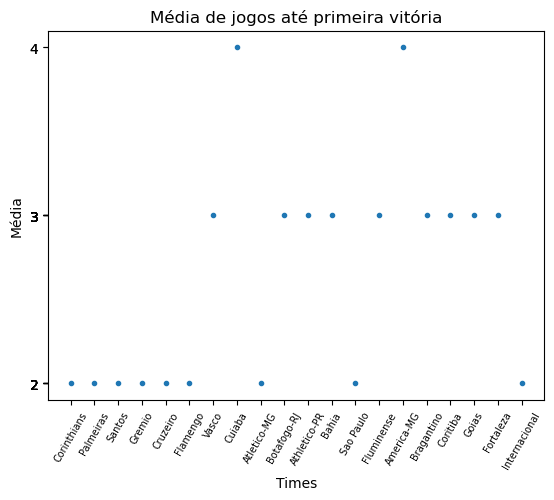

In [11]:
# Gráfico

x = list(esp.keys())
y = list(esp.values())

plt.scatter(x, y, marker='.') 

plt.xlabel('Times') 
plt.ylabel('Média')

plt.title('Média de jogos até primeira vitória')

plt.xticks(rotation=60, fontsize=7)
plt.yticks(y)

plt.savefig('Distribuição geométrica.png', dpi=300)

plt.show()

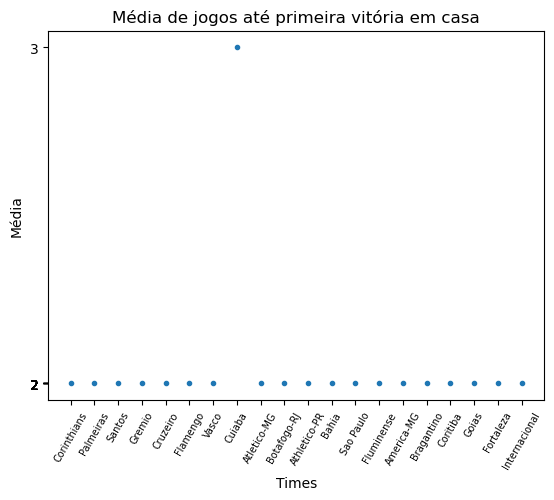

In [21]:
# Gráfico

x = list(esp_casa.keys())
y = list(esp_casa.values())

plt.scatter(x, y, marker='.') 

plt.xlabel('Times') 
plt.ylabel('Média')

plt.title('Média de jogos até primeira vitória em casa')

plt.xticks(rotation=60, fontsize=7)
plt.yticks(y)

plt.savefig('Distribuição geométrica.png', dpi=300)

plt.show()

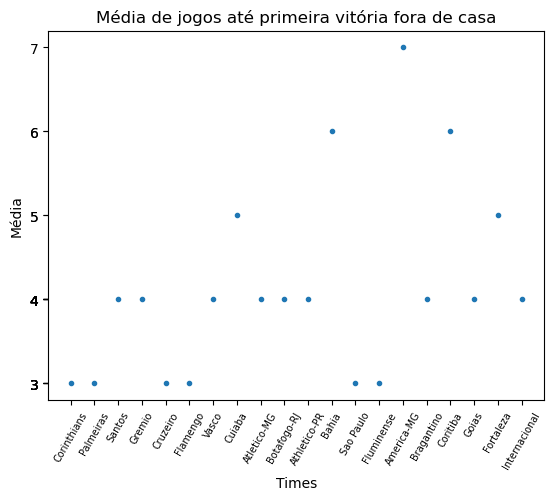

In [22]:
# Gráfico

x = list(esp_fora.keys())
y = list(esp_fora.values())

plt.scatter(x, y, marker='.') 

plt.xlabel('Times') 
plt.ylabel('Média')

plt.title('Média de jogos até primeira vitória fora de casa')

plt.xticks(rotation=60, fontsize=7)
plt.yticks(y)

plt.savefig('Distribuição geométrica.png', dpi=300)

plt.show()

# Distribuição Binomial:
---
## Chutes a gol

In [13]:
# Tabelas usadas nessa análise
bra = cheio[cheio['partida_id'] >= 7646]
bra

gols = tabela[tabela['ID'] >= 7646]
bra

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
15290,7646,1,Fluminense,26,6,66%,545,88%,14,1,0,0,8
15291,7646,1,Santos,3,1,34%,286,71%,18,0,0,4,1
15292,7647,1,Atletico-GO,10,3,44%,403,82%,7,3,0,1,4
15293,7647,1,Flamengo,12,3,56%,502,87%,11,2,0,2,10
15294,7648,1,Palmeiras,17,4,56%,377,81%,17,4,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3


In [14]:
# Calculando a quantidade de gols feitos por equipe
golscasa = gols.groupby('mandante').agg({'mandante_Placar' : 'sum'}) 
golsfora = gols.groupby('visitante').agg({'visitante_Placar' : 'sum'})

res = (golscasa['mandante_Placar'] + golsfora['visitante_Placar']).to_dict()

# Calculando a quantidade de chutes dados pelas equipes
chutes = (bra.groupby('clube').agg({'chutes_no_alvo': 'sum'})).to_dict()
chutes = chutes['chutes_no_alvo']

# Calculando a probabilidade de acerto
prob = {chave: round(res[chave] / chutes[chave], 3) for chave in res}
prob

{'America-MG': 0.209,
 'Athletico-PR': 0.298,
 'Atletico-GO': 0.245,
 'Atletico-MG': 0.254,
 'Avai': 0.264,
 'Botafogo-RJ': 0.237,
 'Bragantino': 0.283,
 'Ceara': 0.207,
 'Corinthians': 0.297,
 'Coritiba': 0.26,
 'Cuiaba': 0.237,
 'Flamengo': 0.293,
 'Fluminense': 0.328,
 'Fortaleza': 0.267,
 'Goias': 0.315,
 'Internacional': 0.309,
 'Juventude': 0.215,
 'Palmeiras': 0.282,
 'Santos': 0.267,
 'Sao Paulo': 0.34}

In [15]:
def bin(k, n, p):
    ''' 
    k: quantidade de gols
    n: chutes a gol
    p: probabilidade de sucesso
    '''
    probabilidade = binom.pmf(k, n, p).round(4)
    return probabilidade

In [25]:
all = [bin(55, 162, 0.34), bin(44, 165, 0.267), bin(66, 234, 0.282), bin(29, 135, 0.215), bin(58, 188, 0.309), bin(40, 127, 0.315), bin(46, 172, 0.267), bin(63, 192, 0.328), 
bin(60, 205, 0.293), bin(31, 131, 0.237), bin(39, 150, 0.26), bin(44, 148, 0.297), bin(34, 164, 0.207), bin(49, 173, 0.283), bin(41, 173, 0.237), bin(34, 129, 0.264),
bin(45, 177, 0.254), bin(39, 159, 0.245), bin(48, 161, 0.298), bin(40, 191, 0.209)]
all

[0.0661,
 0.0701,
 0.0579,
 0.0833,
 0.0629,
 0.076,
 0.0686,
 0.0612,
 0.0611,
 0.0818,
 0.0741,
 0.0716,
 0.0766,
 0.0672,
 0.0712,
 0.0795,
 0.0687,
 0.0734,
 0.0686,
 0.0708]

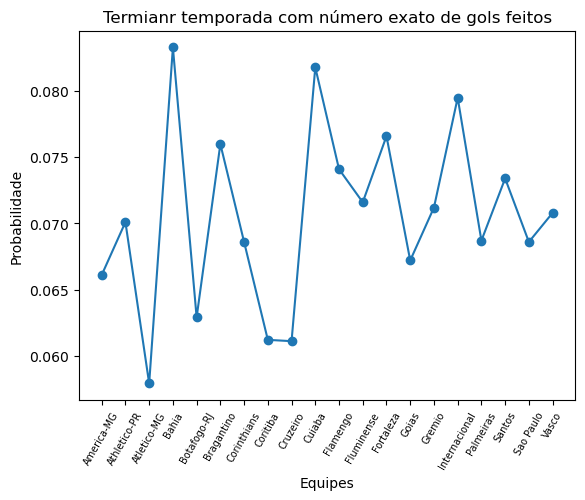

In [39]:
# Dados para o eixo x e y
x = equipes
y = all

# Criar o gráfico de linhas
plt.plot(x, y, marker='o')

# Adicionar rótulos aos eixos
plt.xlabel('Equipes')
plt.ylabel('Probabilidade')

# Adicionar um título ao gráfico
plt.title('Termianr temporada com número exato de gols feitos')
plt.xticks(rotation=60, fontsize=7)

plt.savefig('Distribuição binomial.png', dpi=300)

# Exibir o gráfico
plt.show()

# Intervalo de Confiança
---
## Rebaixamento

In [17]:
pontos = [44, 45, 47, 48, 45, 49, 51, 53, 44, 45, 45, 45, 46, 47, 48, 48, 42, 43, 44, 45, 43, 45, 46, 48, 45, 47, 48, 48, 45, 46, 46, 48, 40, 43, 47, 47, 43, 44, 47, 47, 45, 46, 47, 50, 
         43, 45, 47, 50, 43, 44, 44, 44, 39, 43, 46, 48, 41, 42, 44, 50, 46, 47, 47, 48, 41, 42, 44, 46]

In [18]:
# Parâmetros do teste de hipótese
hipotese_nula = 45  # Média de pontos sob a hipótese nula
nivel_significancia = 0.05  # Nível de significância escolhido

# Realize o teste t de uma amostra
estatistica_t, valor_p = ttest_1samp(pontos, hipotese_nula)

# Compare o valor p com o nível de significância
if valor_p < nivel_significancia:
    print(f'Rejeitar a hipótese nula. Há evidências de que a média é diferente de {hipotese_nula}.')
else:
    print(f'Não rejeitar a hipótese nula. Não há evidências suficientes para afirmar que a média é diferente de {hipotese_nula}.')

# Exibir estatísticas do teste
print(f'Estatística t: {estatistica_t}')
print(f'Valor p: {valor_p}')

Não rejeitar a hipótese nula. Não há evidências suficientes para afirmar que a média é diferente de 45.
Estatística t: 1.8076535909276505
Valor p: 0.07514934228738125


In [19]:
# Calcula o intervalo de confiança para a média
intervalo_confianca = stats.t.interval(0.95, len(pontos)-1, loc=np.mean(pontos), scale=stats.sem(pontos))

print(f'Intervalo de Confiança (95%): {intervalo_confianca}')

Intervalo de Confiança (95%): (44.94023910515304, 46.206819718376366)
